In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


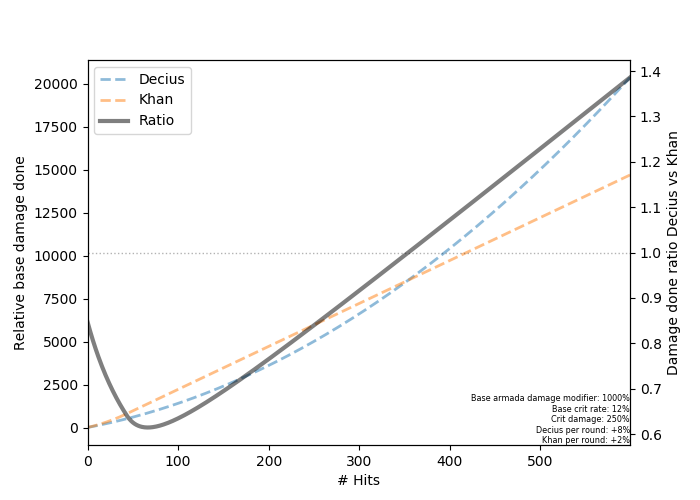

In [317]:
# Base damage modifier against armada hostiles.
# This mostly includes buildings (Ops, Shuttle Bay, ACC), research and officers
base_damage = 10.0

# Base crit rate without Khan.
base_crit_rate = 0.12

# Crit damage.
crit_damage = 2.5

# Officer abilities.
decius_per_round = 0.08
khan_per_round = 0.02

# Number of hits for which to model & plot.
x_hits = np.arange(600)


# ----------------------------------------------------

fig, ax = plt.subplots(num=1, figsize=(7, 5))
relax = ax.twinx()

y_decius = np.cumsum(base_damage + (x_hits * decius_per_round))
y_khan = np.cumsum(base_damage * (1 + np.clip(base_crit_rate+x_hits*khan_per_round, 0.0, 1.0) * (crit_damage - 1)))

l_decius = ax.plot(x_hits, y_decius, '-', label='Decius', lw=2, alpha=0.5, ls='dashed')
l_khan = ax.plot(x_hits, y_khan, '-', label='Khan', lw=2, alpha=0.5, ls='dashed')
l_quot = relax.plot(x_hits, y_decius/y_khan, '-', label='Ratio', lw=3, color='k', alpha=0.5)

relax.hlines(1.0, x_hits[0], x_hits[-1], linestyle='dotted', linewidth=1, alpha=0.3)
relax.set_ylabel('Damage done ratio Decius vs Khan')

ax.set_xlim(x_hits[0], x_hits[-1])
ax.set_xlabel('# Hits')
ax.set_ylabel('Relative base damage done')
ax.legend(l_decius + l_khan + l_quot,
          [l.get_label() for l in l_decius + l_khan + l_quot], loc=0)
ax.text(x_hits[-1], ax.get_ylim()[0],
        f'Base armada damage modifier: {base_damage*100:.0f}%\n'
        f'Base crit rate: {base_crit_rate*100:.0f}%\n'
        f'Crit damage: {crit_damage*100:.0f}%\n'
        f'Decius per round: +{decius_per_round*100:.0f}%\n'
        f'Khan per round: +{khan_per_round*100:.0f}%',
        ha='right', va='bottom',
        fontsize='xx-small')
pass

<IPython.core.display.Javascript object>


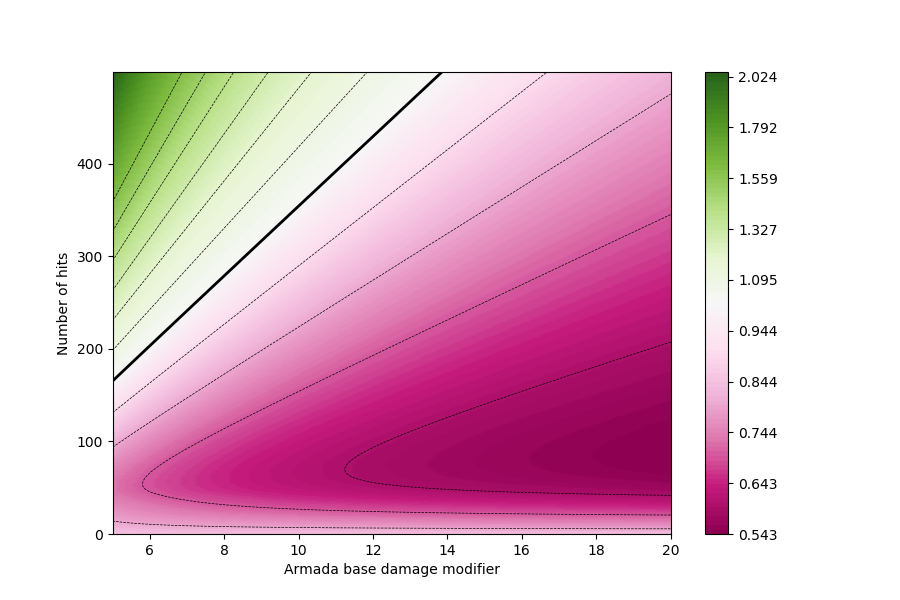

Text(0, 0.5, 'Number of hits')

In [320]:
x_hits = np.arange(500)
y_damage = np.linspace(5.0, 20.0, 150)

z_decius = np.cumsum(y_damage[None, :] + (x_hits[:, None] * decius_per_round), axis=0)
z_khan = np.cumsum(y_damage[None, :] * (1 + np.clip(base_crit_rate+x_hits[:, None]*khan_per_round, 0.0, 1.0) * (crit_damage - 1)), axis=0)
z_quot = z_decius / z_khan

cm = 'PiYG'
norm = BoundaryNorm(
    np.concatenate([np.linspace(z_quot.min(), 0.99, 50), [1.0], np.linspace(1.01, z_quot.max(), 50)]),
    ncolors=plt.get_cmap(cm).N)

lines_below = [0.5, 0.6, 0.7, 0.8, 0.9]
lines_above = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6]

fig, ax = plt.subplots(num=2, ncols=1, nrows=1, figsize=(9, 6), clear=True)
map_quot = ax.pcolormesh(y_damage, x_hits, z_quot, norm=norm, cmap=cm, shading='gouraud')
ax.contour(y_damage, x_hits, z_quot, lines_below + [1.0] + lines_above, colors='k', origin='upper',
           linewidths=[0.5]*len(lines_below) + [2.0] + [0.5] * len(lines_above),
           linestyles=['dashed']*len(lines_below) + ['solid'] + ['dashed'] * len(lines_above))
fig.colorbar(map_quot)

ax.set_xlabel('Armada base damage modifier')
ax.set_ylabel('Number of hits')